# LSTM Train - Trafik - No PCA

In [1]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [2]:
DATASET_PATH = config.DATA_INTERIM
df = pd.read_parquet(DATASET_PATH / 'sample.parquet')
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/1000  Train Loss: 15461.1621  Val Loss: 15185.7363  Val MSE: 15185.7354  Val R2: -1.6409
Epoch 2/1000  Train Loss: 15450.1309  Val Loss: 15173.7812  Val MSE: 15173.7803  Val R2: -1.6388
Epoch 3/1000  Train Loss: 15438.2051  Val Loss: 15161.0498  Val MSE: 15161.0498  Val R2: -1.6366
Epoch 4/1000  Train Loss: 15425.5039  Val Loss: 15147.6631  Val MSE: 15147.6631  Val R2: -1.6343
Epoch 5/1000  Train Loss: 15412.1504  Val Loss: 15133.7363  Val MSE: 15133.7354  Val R2: -1.6319
Epoch 6/1000  Train Loss: 15398.2549  Val Loss: 15119.3672  Val MSE: 15119.3672  Val R2: -1.6294
Epoch 7/1000  Train Loss: 15383.9199  Val Loss: 15104.6436  Val MSE: 15104.6455  Val R2: -1.6268
Epoch 8/1000  Train Loss: 15369.2324  Val Loss: 15089.6484  Val MSE: 15089.6475  Val R2: -1.6242
Epoch 9/1000  Train Loss: 15354.2695  Val Loss: 15074.4404  Val MSE: 15074.4395  Val R2: -1.6216
Epoch 10/1000  Train Loss: 15339.0957  Val Loss: 15059.0771  Val MSE: 15059.0771  Val R2: -1.6189
Epoch 11/1000  Train Loss: 15

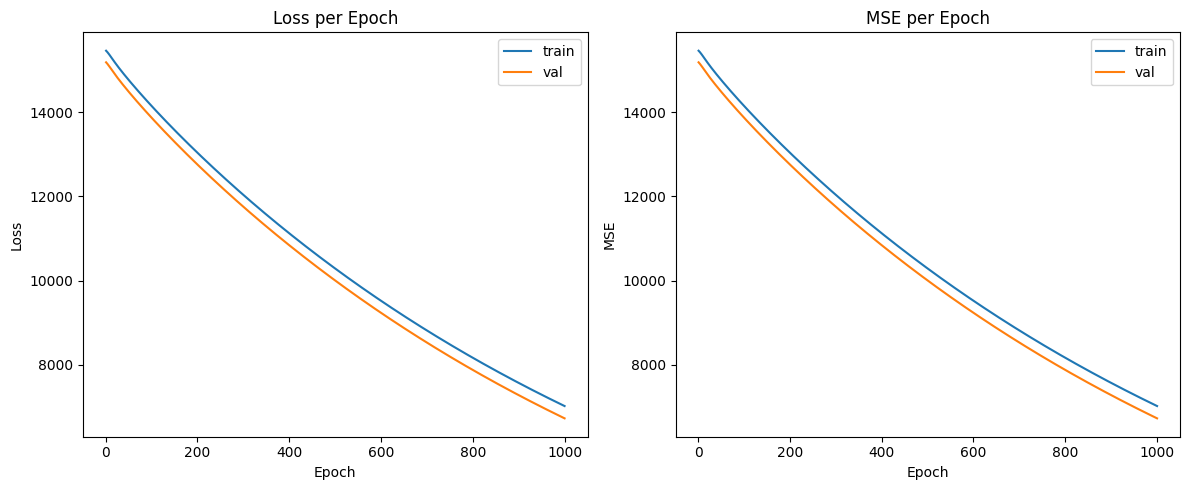

== Final Metrics ==
mse: 6728.01318359375
mae: 54.13914108276367
r2: -0.17005670070648193


In [3]:
# PCA kullanılmıyor
dataset = TrafficDataset(data_array, X_STEP, Y_STEP)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=10, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=10)
predictor = TrafficPredictor('lstm', dataset.sensors, X_STEP, Y_STEP, pca_model=dataset.pca if False else None)
predictor.train(train_loader, val_loader, epochs=1000, save_path=config.PROJECT_ROOT.joinpath('models/lstm_trafik_nopca.pt'), save_optimizer=True)
predictor.show()